In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
import pandas_datareader as pdr

In [3]:
from datetime import datetime

In [6]:
#Ajoute une grille différente derrière les grafs seaborn
sns.set_style('whitegrid')

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [22]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [26]:
GOOG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-03,1123.540039,1079.810059,1119.015015,1097.880005,2313400,1097.880005
2020-04-06,1194.660034,1130.939941,1138.000000,1186.920044,2664700,1186.920044
2020-04-07,1225.000000,1182.229980,1221.000000,1186.510010,2387300,1186.510010
2020-04-08,1219.069946,1188.160034,1206.500000,1210.280029,1975100,1210.280029
2020-04-09,1225.569946,1196.734985,1224.079956,1211.449951,2175400,1211.449951


In [27]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,243.191080,237.835840,240.189359,240.724120,3.291663e+07,239.612384
std,43.340129,42.077706,42.585858,42.921476,1.741315e+07,43.468757
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,205.872498,202.537502,204.012501,204.177502,2.156990e+07,201.907238
50%,230.184998,226.570000,228.004997,228.150002,2.726840e+07,227.351234
75%,271.550011,265.742493,268.425003,270.152496,3.657715e+07,269.549271
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [28]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-04-15 to 2020-04-09
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


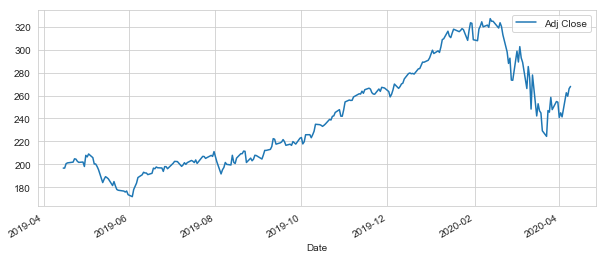

In [29]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

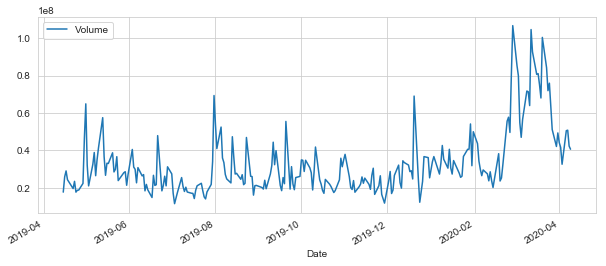

In [30]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [31]:
ma_day = [10,20,50]

In [46]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

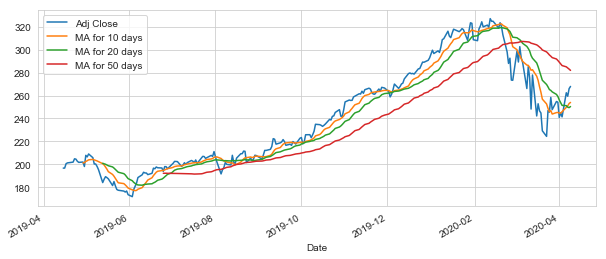

In [54]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

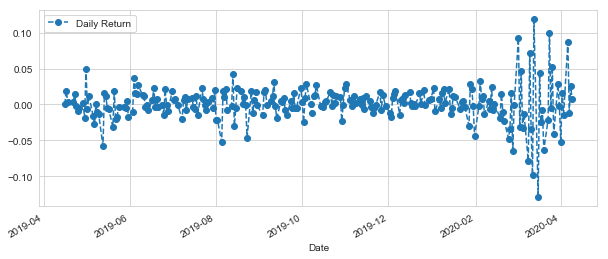

In [55]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


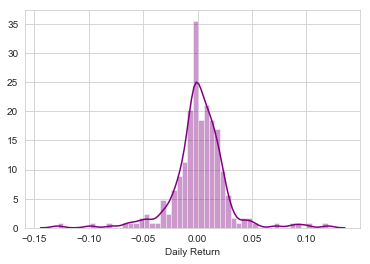

In [61]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='purple')

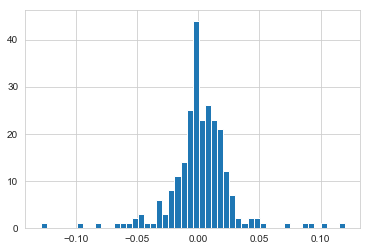

In [60]:
AAPL['Daily Return'].hist(bins=50)

In [62]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [63]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-15,196.655960,1844.869995,1221.099976,119.469353
2019-04-16,196.675705,1863.040039,1227.130005,119.193001
2019-04-17,200.505585,1864.819946,1236.339966,120.179947
2019-04-18,201.226151,1861.689941,1236.369995,121.759056
2019-04-22,201.887497,1887.310059,1248.839966,122.143959


In [129]:
tech_rets = closing_df.pct_change()*100

In [130]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-15,NaN,NaN,NaN,NaN
2019-04-16,0.010040,0.984896,0.493819,-0.231316
2019-04-17,1.947307,0.095538,0.750529,0.828024
2019-04-18,0.359374,-0.167845,0.002429,1.313954
2019-04-22,0.328658,1.376175,1.008595,0.316119


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


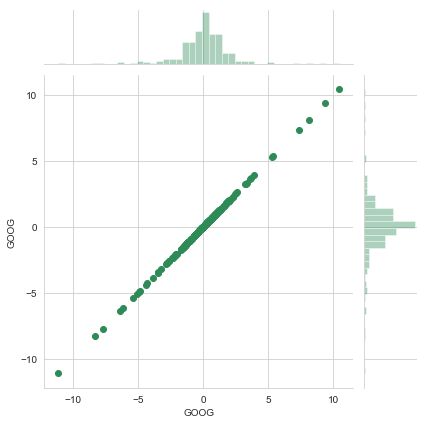

In [131]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


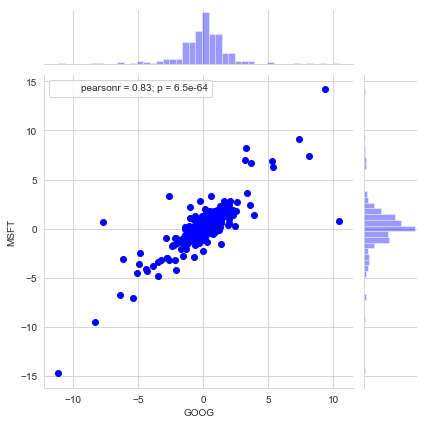

In [132]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue').annotate(stats.pearsonr)

In [133]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-15,NaN,NaN,NaN,NaN
2019-04-16,0.010040,0.984896,0.493819,-0.231316
2019-04-17,1.947307,0.095538,0.750529,0.828024
2019-04-18,0.359374,-0.167845,0.002429,1.313954
2019-04-22,0.328658,1.376175,1.008595,0.316119


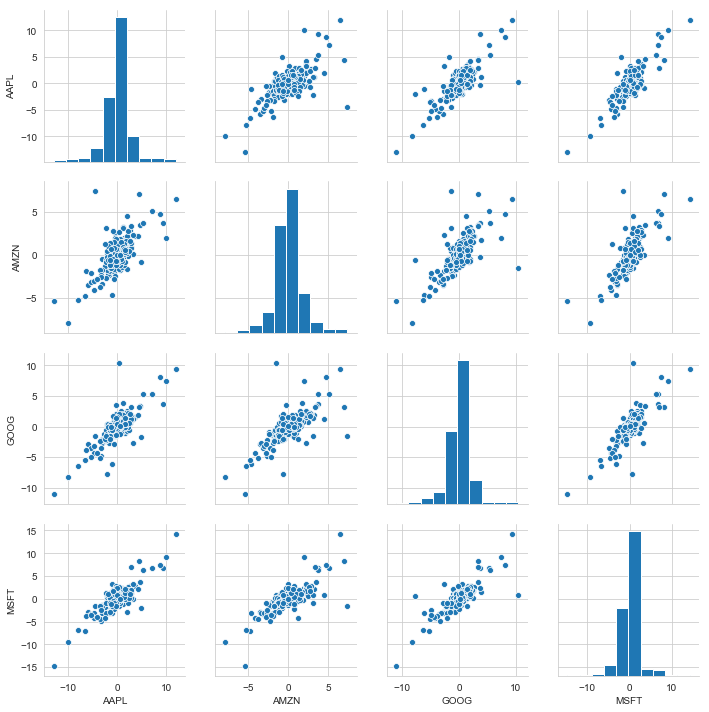

In [134]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


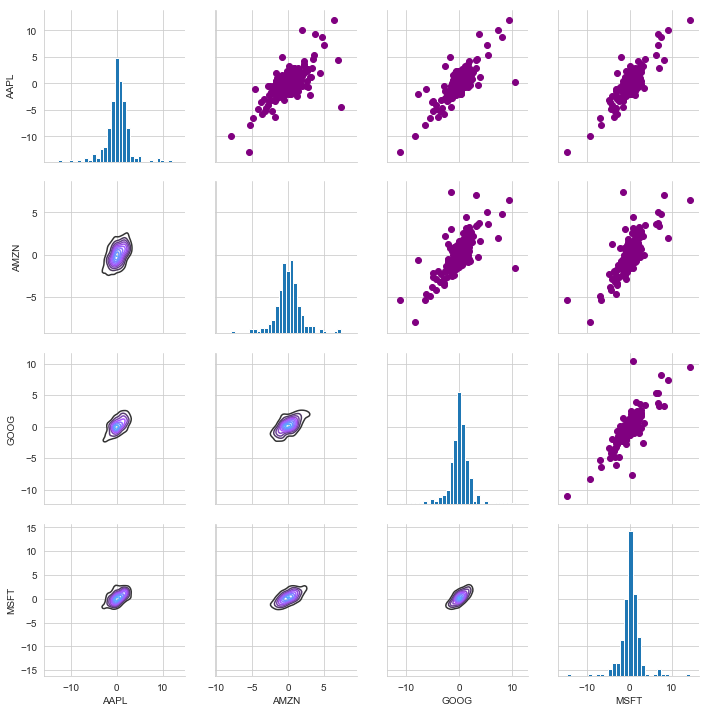

In [135]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


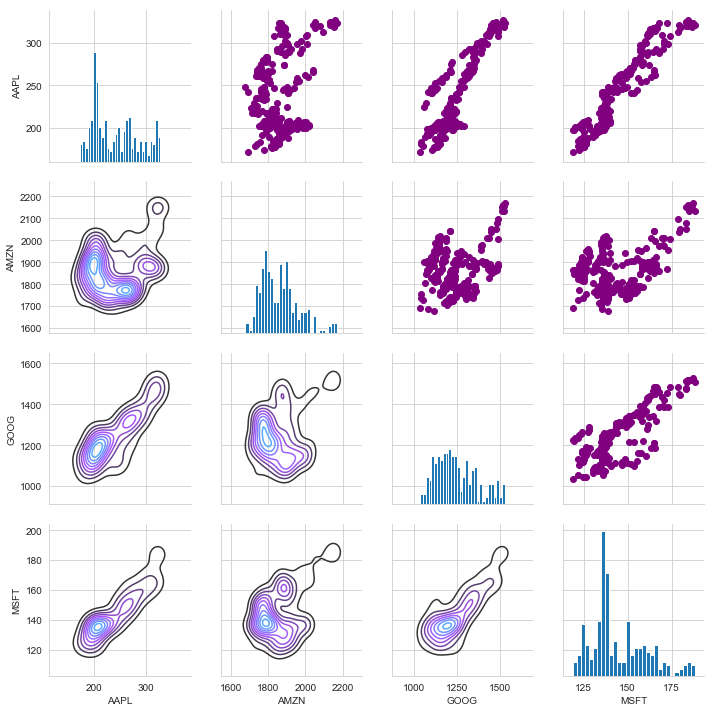

In [136]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


In [137]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-15,NaN,NaN,NaN,NaN
2019-04-16,0.010040,0.984896,0.493819,-0.231316
2019-04-17,1.947307,0.095538,0.750529,0.828024
2019-04-18,0.359374,-0.167845,0.002429,1.313954
2019-04-22,0.328658,1.376175,1.008595,0.316119


In [123]:
tech_rets2 = tech_rets

In [124]:
tech_rets2['year'] = pd.DatetimeIndex(tech_rets.index).year

In [125]:
tech_rets_year = tech_rets.groupby('year')

In [126]:
tech_rets_year = tech_rets.set_index('year')

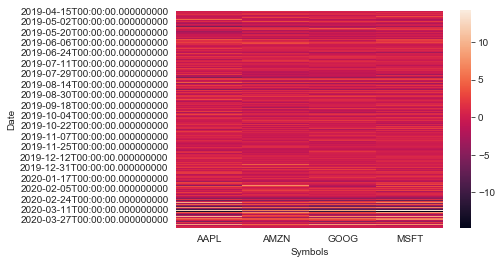

In [140]:
sns.heatmap(tech_rets)

In [139]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-15,NaN,NaN,NaN,NaN
2019-04-16,0.010040,0.984896,0.493819,-0.231316
2019-04-17,1.947307,0.095538,0.750529,0.828024
2019-04-18,0.359374,-0.167845,0.002429,1.313954
2019-04-22,0.328658,1.376175,1.008595,0.316119


In [142]:
rets = tech_rets.dropna()

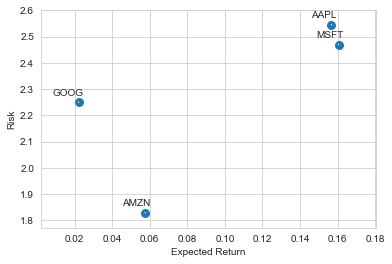

In [148]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext = (5,5),
    textcoords = 'offset points',ha='right',va='bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


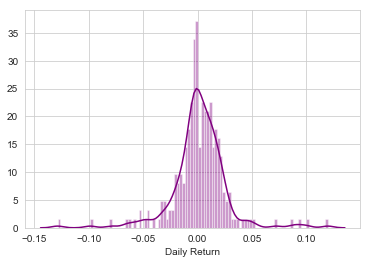

In [149]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [150]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-16,0.010040,0.984896,0.493819,-0.231316
2019-04-17,1.947307,0.095538,0.750529,0.828024
2019-04-18,0.359374,-0.167845,0.002429,1.313954
2019-04-22,0.328658,1.376175,1.008595,0.316119
2019-04-23,1.442321,1.931848,1.257974,1.357475


In [151]:
rets['AAPL'].quantile(0.05)

-3.4387177761882333

In [152]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [162]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*drift[x] + shock[x])
    return price

In [163]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-15,1224.199951,1209.109985,1218.000000,1221.099976,1187400,1221.099976
2019-04-16,1230.819946,1220.119995,1225.000000,1227.130005,856300,1227.130005
2019-04-17,1240.560059,1227.819946,1233.000000,1236.339966,1221900,1236.339966
2019-04-18,1242.000000,1234.609985,1239.180054,1236.369995,1331800,1236.369995
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966


Text(0.5,1,'Monte Carlo analysis for Google')

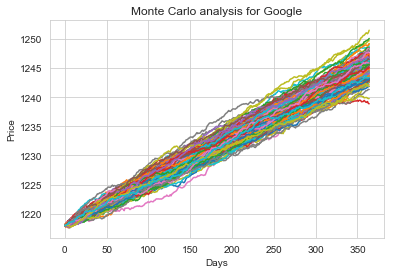

In [165]:
start_price = 1218.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
             
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Google')

In [170]:
runs = 10000
simulation = np.zeros(runs)
for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

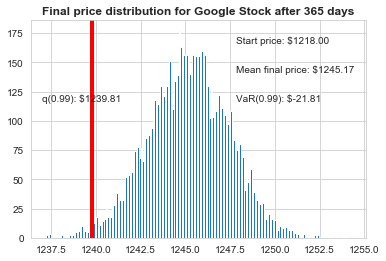

In [171]:
q = np.percentile(simulations,1)

plt.hist(simulation,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');